<a href="https://colab.research.google.com/github/sheikmohdimran/Experiments_2019/blob/master/Pytorch_Permute_Unfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Example #1**

In [0]:
!wget https://eoimages.gsfc.nasa.gov/images/imagerecords/88000/88094/niobrara_photo_lrg.jpg

--2019-08-11 11:56:46--  https://eoimages.gsfc.nasa.gov/images/imagerecords/88000/88094/niobrara_photo_lrg.jpg
Resolving eoimages.gsfc.nasa.gov (eoimages.gsfc.nasa.gov)... 129.164.142.12, 2001:4d0:2310:170::12
Connecting to eoimages.gsfc.nasa.gov (eoimages.gsfc.nasa.gov)|129.164.142.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1983878 (1.9M) [image/jpeg]
Saving to: ‘niobrara_photo_lrg.jpg’

niobrara_photo_lrg. 100%[===================>]   1.89M  1.31MB/s    in 1.4s    

2019-08-11 11:56:48 (1.31 MB/s) - ‘niobrara_photo_lrg.jpg’ saved [1983878/1983878]



In [0]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.utils import save_image
import torchvision.transforms as transforms
from pathlib import Path

In [0]:
patch_size=512
stride=patch_size
pil2tensor = transforms.ToTensor()


file=Path('/content/niobrara_photo_lrg.jpg')
filename=file.stem

rgb_image = pil2tensor(Image.open(file))
patches = rgb_image.data.unfold(0, 3, 3).unfold(1, patch_size, stride).unfold(2, patch_size, stride)
a = list(patches.shape)

x = patches[:,torch.from_numpy(np.arange(0,a[1])),:,:,:,:].split(1, dim=1)
for i in list(np.arange(a[1])):
  y =  x[i][:,:,torch.from_numpy(np.arange(0,a[2])),:,:,:].split(1, dim=2)
  for j in list(np.arange(a[2])):
    save_image(y[j], filename+'-'+str(i)+'-'+str(j)+'.png')


In [0]:
!rm -rf *png

In [0]:
def plot_image(tensor):
    plt.figure()
    # imshow needs a numpy array with the channel dimension
    # as the the last dimension so we have to transpose things.
    plt.imshow(tensor.numpy().transpose(1, 2, 0))
    plt.show()

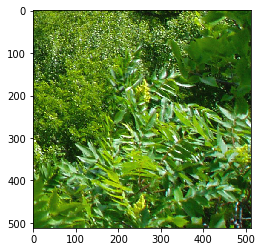

In [0]:
plot_image(patches[0][2][3])
#patches[0][1][1].shape

In [0]:
#          ([0, 1, 2, 3,   4, 5  ])
#torch.Size([1, 3, 4, 3, 512, 512])

#loc                (0, 3, 1, 4  , 2, 5   )
#val                 1, 3, 3, 512, 4, 512
#                       3, 1536  , 2048  == re.shape

re = patches.permute(0,3,1,4,2,5).contiguous().view_as(rgb_image.data)
print((re == rgb_image.data).all())

tensor(1, dtype=torch.uint8)


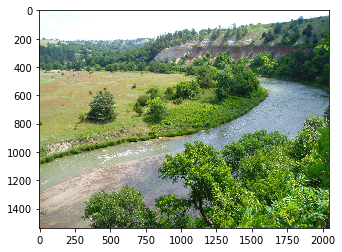

In [0]:
plot_image(re)

**Example #2**

In [0]:
import torch.nn.functional as F
#img = torch.randn(3, 5176, 3793)

pil_image = Image.open('test1.jpg')
img = pil2tensor(pil_image)

img.shape

torch.Size([3, 3793, 5176])

In [0]:
img = F.pad(img, (36,36,23, 24)) #Pad to get to multiples of 128
img.shape

torch.Size([3, 3840, 5248])

In [0]:
patches = img.data.unfold(0, 3, 3).unfold(1, 128, 128).unfold(2, 128, 128)
patches.shape

torch.Size([1, 30, 41, 3, 128, 128])

In [0]:
re = patches.permute(0, 3, 1, 4, 2, 5).contiguous().view_as(img)
print((re == img).all())

tensor(1, dtype=torch.uint8)


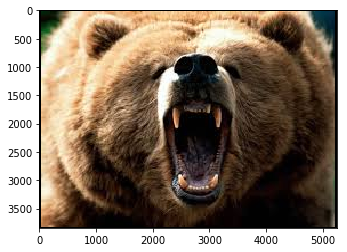

In [0]:
plot_image(re)

In [0]:
re.shape

torch.Size([3, 3840, 5248])